In [74]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA
import time
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

In [75]:
# Read the image
image_raw = imread(r"D:\SEM 4\SIP\Project\win.jpeg")
print(image_raw.shape)

(612, 407, 3)


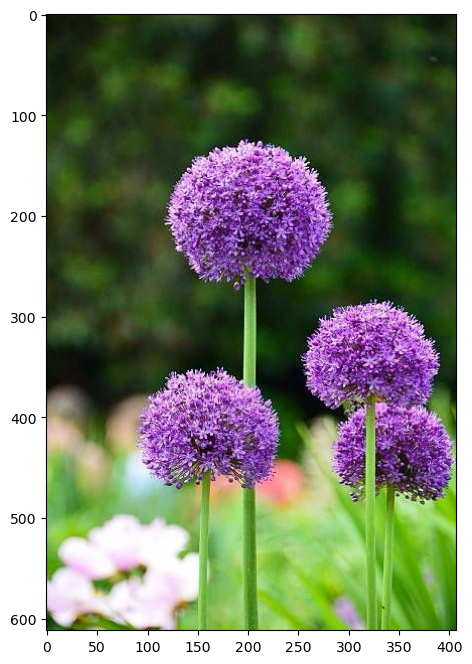

In [76]:
# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

In [77]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum / image_sum.max()
print(image_bw.max())


(612, 407)
1.0


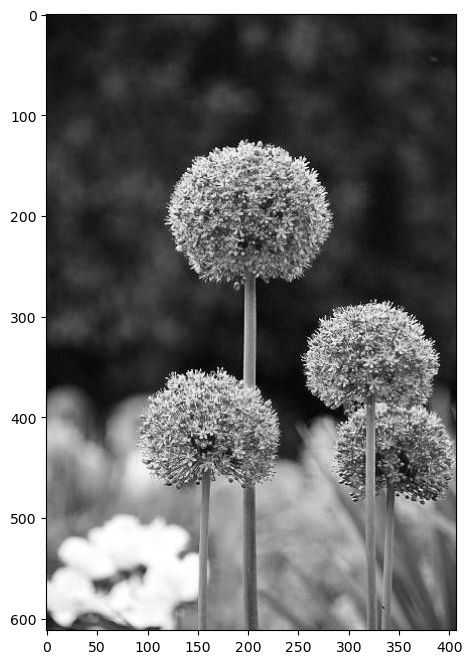

In [78]:
plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

In [79]:
from sklearn.decomposition import PCA, IncrementalPCA

# PCA Compression
pca = PCA()
pca.fit(image_bw)
var_cumu = np.cumsum(pca.explained_variance_ratio_) * 100
k = np.argmax(var_cumu > 95)

In [80]:
# PSNR
psnr_value = psnr(image_bw, image_recon)
print("PSNR:", psnr_value)

# SSIM (uncomment if needed)
# ssim_value = ssim(image_bw, image_recon)
# print("SSIM:", ssim_value)

PSNR: 32.74820433983926


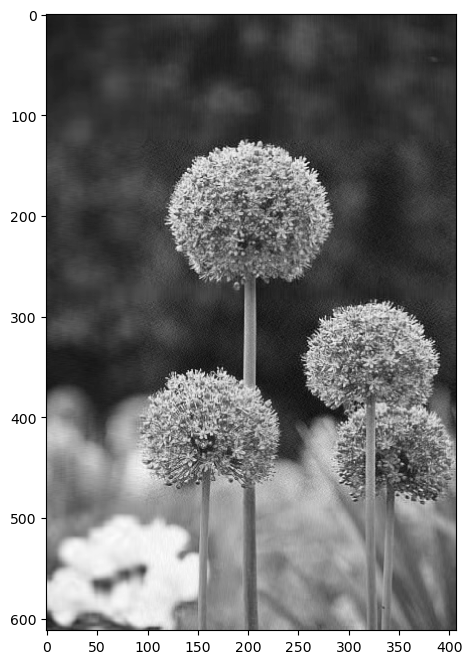

In [81]:
# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon, cmap=plt.cm.gray)

Compression Ratio for 10 components: 40.70
PSNR for 10 components: 20.30 dB
SSIM for 10 components: 0.6160
Computational Time for 10 components: 0.2868 seconds


Compression Ratio for 25 components: 16.28
PSNR for 25 components: 22.52 dB
SSIM for 25 components: 0.6932
Computational Time for 25 components: 0.4343 seconds


Compression Ratio for 50 components: 8.14
PSNR for 50 components: 24.76 dB
SSIM for 50 components: 0.7658
Computational Time for 50 components: 0.3570 seconds


Compression Ratio for 100 components: 4.07
PSNR for 100 components: 28.70 dB
SSIM for 100 components: 0.8488
Computational Time for 100 components: 0.2229 seconds


Compression Ratio for 150 components: 2.71
PSNR for 150 components: 32.75 dB
SSIM for 150 components: 0.9073
Computational Time for 150 components: 0.2209 seconds


Compression Ratio for 250 components: 1.63
PSNR for 250 components: 43.23 dB
SSIM for 250 components: 0.9821
Computational Time for 250 components: 0.1969 seconds




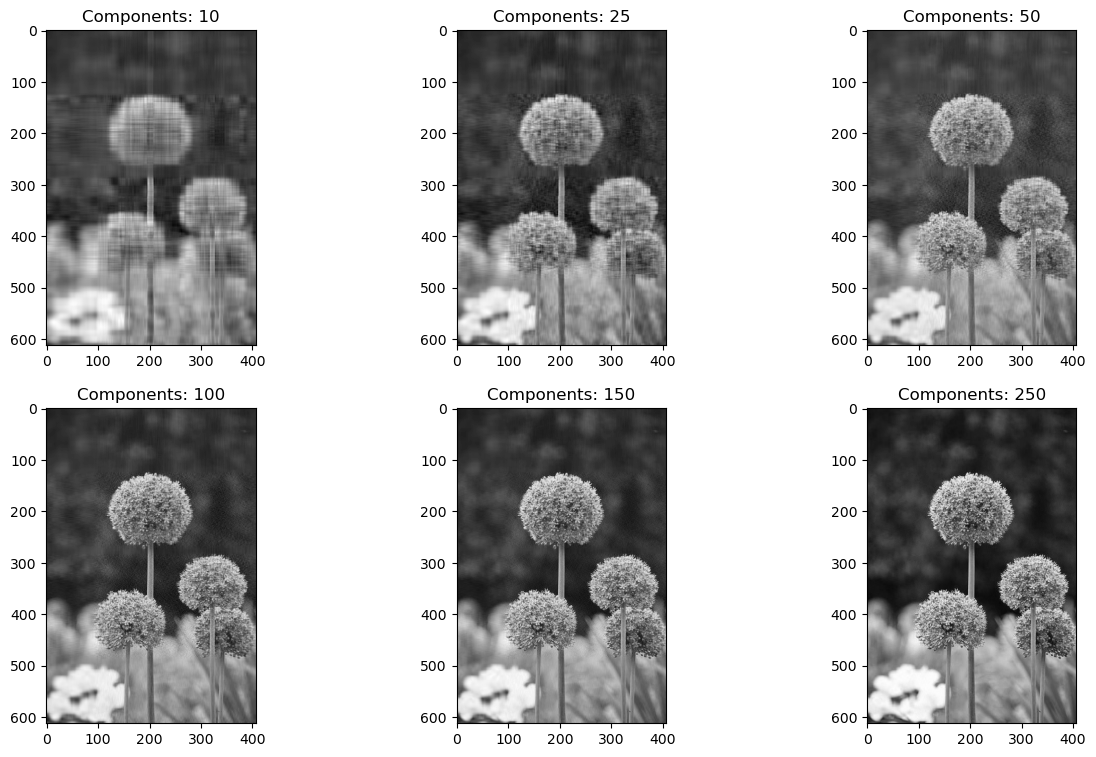

In [83]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    transformed_data = ipca.fit_transform(image_bw)
    image_recon = ipca.inverse_transform(transformed_data)
    plt.imshow(image_recon, cmap=plt.cm.gray)
    
    # Calculate Compression Ratio
    original_size = image_bw.size
    compressed_size = transformed_data.size
    compression_ratio = original_size / compressed_size
    print(f"Compression Ratio for {k} components: {compression_ratio:.2f}")
    
    # Calculate PSNR
    psnr_value = psnr(image_bw, image_recon, data_range=image_bw.max() - image_bw.min())
    print(f"PSNR for {k} components: {psnr_value:.2f} dB")
    
    # Calculate SSIM
    ssim_value = ssim(image_bw, image_recon, data_range=image_bw.max() - image_bw.min())
    print(f"SSIM for {k} components: {ssim_value:.4f}")
    
    # Print Computational Time
    print(f"Computational Time for {k} components: {computational_time:.4f} seconds")


ks = [10, 25, 50, 100, 150, 250]

plt.figure(figsize=[15,9])

for i in range(6):
    start_time = time.time()
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))
    end_time = time.time()
    computational_time = end_time - start_time
    print("\n")
    
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()
